# Medical data Visualizer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Open the csv and asign a variable
df = pd.read_csv(r"/content/medical_examination.csv")

In [3]:
df["overweight"]= df["weight"]/((df["height"]/100)**2)
df["overweight"] = df["weight"] / ((df["height"] / 100) ** 2)
df.loc[df["overweight"] < 25, "overweight"] = 0
df.loc[df["overweight"] > 25, "overweight"] = 1

#change values on "cholesterol" and "gluc" columns that have 1 per 0 and 2 or 3 per 1
df.loc[df["cholesterol"] == 1, "cholesterol"] = 0
df.loc[df["cholesterol"] > 1, "cholesterol"] = 1
df.loc[df["gluc"] == 1, "gluc"] = 0
df.loc[df["gluc"] > 1, "gluc"] = 1

In [6]:
#clean data
# delete patients that have "ap_lo" higher than "ap_hi"
df = df.drop(df.loc[df["ap_lo"] > df["ap_hi"]].index)

# delete patients that height is less than the 2.5th percentile
df = df.drop(df.loc[df["height"] < df["height"].quantile(0.025)].index)

# delete patients that height is more than the 97.5th percentile
df = df.drop(df.loc[df["height"] > df["height"].quantile(0.975)].index)

# delete patients that weight is less than the 2.5th percentile
df = df.drop(df.loc[df["weight"] < df["weight"].quantile(0.025)].index)

#delete patients that weight is more than the 97.5th percentile
df = df.drop(df.loc[df["weight"] > df["weight"].quantile(0.975)].index)

# create 2 new dataframes when the vaelue of "cardio" is 0 and 1
df0 = df[df["cardio"] == 0].copy()
df1 = df[df["cardio"] == 1].copy()

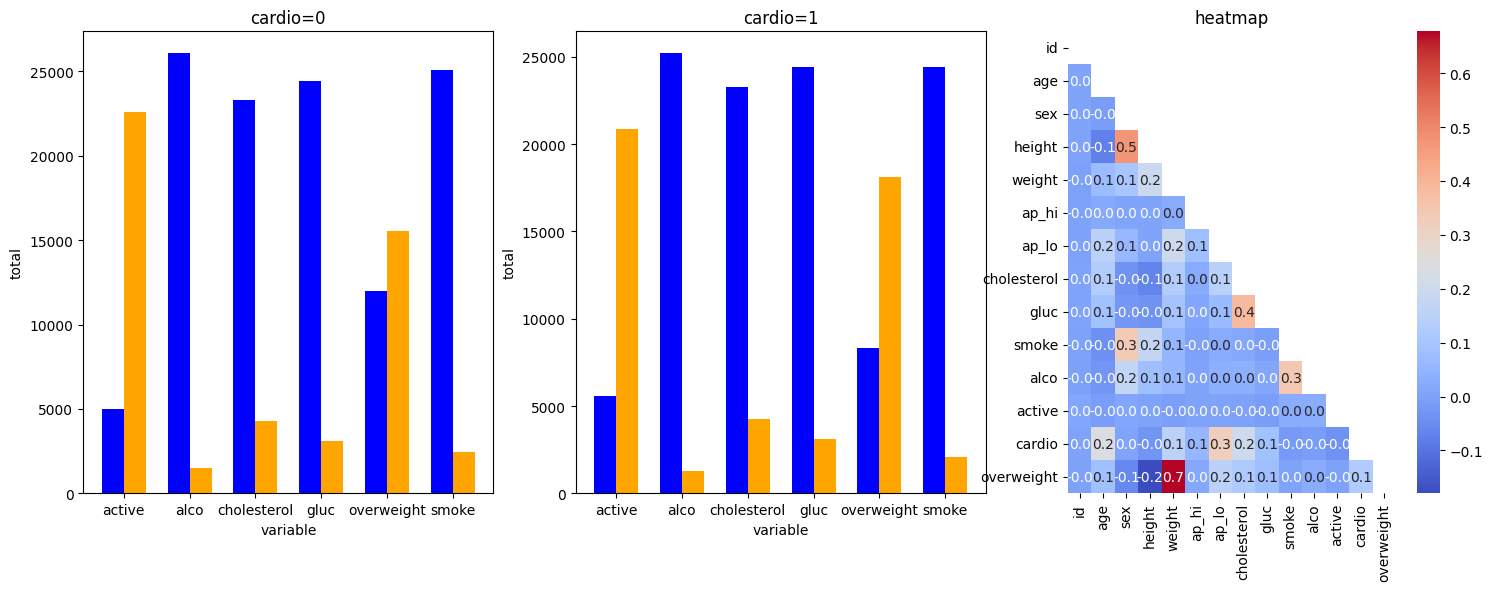

In [9]:
#set the size of histogram
plt.figure(figsize= (18,6))

#create first panel
plt.subplot(1,3,1)
plt.title("cardio=0")
#add data
plt.bar(x =1, height= len(df0["active"][df0["active"]==0]), width= 1, color= "blue")
plt.bar(x =2, height= len(df0["active"][df0["active"]==1]), width= 1, color= "orange")
plt.bar(x =4, height= len(df0["alco"][df0["alco"]==0]), width= 1, color= "blue")
plt.bar(x =5, height= len(df0["alco"][df0["alco"]==1]), width= 1, color= "orange")
plt.bar(x =7, height= len(df0["cholesterol"][df0["cholesterol"]==0]), width= 1, color= "blue")
plt.bar(x =8, height= len(df0["cholesterol"][df0["cholesterol"]==1]), width= 1, color= "orange")
plt.bar(x =10, height= len(df0["gluc"][df0["gluc"]==0]), width= 1, color= "blue")
plt.bar(x =11, height= len(df0["gluc"][df0["gluc"]==1]), width= 1, color= "orange")
plt.bar(x =13, height= len(df0["overweight"][df0["overweight"]==0]), width= 1, color= "blue")
plt.bar(x =14, height= len(df0["overweight"][df0["overweight"]==1]), width= 1, color= "orange")
plt.bar(x =16, height= len(df0["smoke"][df0["smoke"]==0]), width= 1, color= "blue")
plt.bar(x =17, height= len(df0["smoke"][df0["smoke"]==1]), width= 1, color= "orange")

plt.xlabel("variable")
plt.ylabel("total")
plt.xticks([1.5, 4.5, 7.5, 10.5, 13.5, 16.5], ["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])

#create second panel
plt.subplot(1,3,2)
plt.title("cardio=1")
#add data
plt.bar(x =1, height= len(df1["active"][df1["active"]==0]), width= 1, color= "blue")
plt.bar(x =2, height= len(df1["active"][df1["active"]==1]), width= 1, color= "orange")
plt.bar(x =4, height= len(df1["alco"][df1["alco"]==0]), width= 1, color= "blue")
plt.bar(x =5, height= len(df1["alco"][df1["alco"]==1]), width= 1, color= "orange")
plt.bar(x =7, height= len(df0["cholesterol"][df0["cholesterol"]==0]), width= 1, color= "blue")
plt.bar(x =8, height= len(df0["cholesterol"][df0["cholesterol"]==1]), width= 1, color= "orange")
plt.bar(x =10, height= len(df0["gluc"][df0["gluc"]==0]), width= 1, color= "blue")
plt.bar(x =11, height= len(df0["gluc"][df0["gluc"]==1]), width= 1, color= "orange")
plt.bar(x =13, height= len(df1["overweight"][df1["overweight"]==0]), width= 1, color= "blue")
plt.bar(x =14, height= len(df1["overweight"][df1["overweight"]==1]), width= 1, color= "orange")
plt.bar(x =16, height= len(df1["smoke"][df1["smoke"]==0]), width= 1, color= "blue")
plt.bar(x =17, height= len(df1["smoke"][df1["smoke"]==1]), width= 1, color= "orange")

plt.xlabel("variable")
plt.ylabel("total")
plt.xticks([1.5, 4.5, 7.5, 10.5, 13.5, 16.5], ["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])



#create third panel
plt.subplot(1,3,3)
plt.title("heatmap")


# Create the heatmap with seaborn
corr_matrix= df.corr()
upper_triangle_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sb.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', mask=upper_triangle_mask)





#print histogram
plt.show()